In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv('flag.data' , header = None)


data.columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

print(data.head())

             name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours  ...  saltires  quarters  sunstars  crescent  triangle  \
0        3        5  ...         0         0         1         0         0   
1        0        3  ...         0         0         1         0         0   
2        0        3  ...         0         0         1         1         0   
3        0        5  ...         0         0         0         0         1   
4        0        3  ...         0         0         0         0         0   

   icon  animate text  topleft  botright  
0

In [58]:
dataset = data.drop(columns = ['name', 'religion'])

print(dataset.topleft.unique())

dataset['topleft'] = pd.Categorical(dataset.topleft, categories = dataset.topleft.unique(), ordered = False)
dataset['botright'] = pd.Categorical(dataset.botright, categories = dataset.botright.unique(), ordered = False)
dataset['mainhue'] = pd.Categorical(dataset.mainhue, categories = dataset.mainhue.unique(), ordered = False)

dataset['topleft_int'] = dataset.topleft.cat.codes
dataset['botright_int'] = dataset.botright.cat.codes
dataset['mainhue_int'] = dataset.mainhue.cat.codes

dataset = dataset.drop(columns = ['topleft', 'botright', 'mainhue'])

labels = data.religion

#print(dataset.head())

train_data, test_data, train_labels, test_labels = train_test_split(dataset, labels, random_state = 1)

print(train_data.info())

['black' 'red' 'green' 'blue' 'white' 'orange' 'gold']
<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 107 to 37
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   landmass      145 non-null    int64
 1   zone          145 non-null    int64
 2   area          145 non-null    int64
 3   population    145 non-null    int64
 4   language      145 non-null    int64
 5   bars          145 non-null    int64
 6   stripes       145 non-null    int64
 7   colours       145 non-null    int64
 8   red           145 non-null    int64
 9   green         145 non-null    int64
 10  blue          145 non-null    int64
 11  gold          145 non-null    int64
 12  white         145 non-null    int64
 13  black         145 non-null    int64
 14  orange        145 non-null    int64
 15  circles       145 non-null    int64
 16  crosses       145 non-null    int64
 17  saltires      145 non-null    int64
 18  quarters      145 n

In [60]:
classifier = DecisionTreeClassifier(random_state = 1)

classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

print(classifier.tree_.max_depth)

0.6326530612244898
11


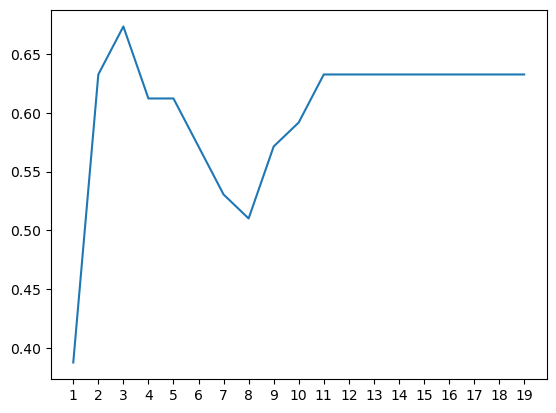

0.673469387755102


In [65]:
score = []

for i in range(1, 20):
    classifier = DecisionTreeClassifier(random_state = 1, max_depth=i)

    classifier.fit(train_data, train_labels)
    score.append(classifier.score(test_data, test_labels))


plt.plot(range(1,20), score)
plt.xticks(range(1,20))
plt.show()

print(score[2])